Here I will check the jfs theory against simulations run using Ali's truncated coalescent simulator (not a Moran simulator) 

In [1]:
import pandas as pd
import numpy as np
import pickle
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
folder = '/home/farid/Documents/git/jfsNumerics/'
data_folder = folder+'data/'

In [2]:
#The simulated jfs distribution was calculated in a seperate Python script
with open("/home/farid/Documents/NonGitCode/JFSDist5E4", "rb") as file: 
    jfsDist_sim = pickle.load(file)

In [3]:
jfsDist_sim = 1/2 * (jfsDist_sim + np.transpose(jfsDist_sim))
jfsDist_sim /= np.sum(jfsDist_sim)

In [4]:
#importing theoretical calculations which were done in Mathematica
from functools import reduce
with open(folder+'Mathematica/JointFreqSpectrum10_Revised'
          ,'rb') as f:
    depth=np.fromfile(f,dtype=np.dtype('int32'),count=1)
    dims =np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs10 =np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
         count=reduce(lambda x,y:x*y,dims)),dims)


In [5]:
with open(folder+'Mathematica/JointFreqSpectrum10_StepChangeTau25c2',
          'rb') as f: 
    depth=np.fromfile(f, dtype=np.dtype('int32'), count=1)
    dims = np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs_stepChange_25_2_theory=np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
                                                count=reduce(lambda x,y:x*y,dims)), dims)

In [6]:
relative_diff = (jfs10-jfs_stepChange_25_2_theory)/jfs10

In [7]:
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set()
plt.rcParams["font.family"] = "monospace"

In [8]:
log_sim = np.log(jfsDist_sim)
log_theory = np.log(jfs10)
log_stepChange_25_2_theory = np.log(jfs_stepChange_25_2_theory)

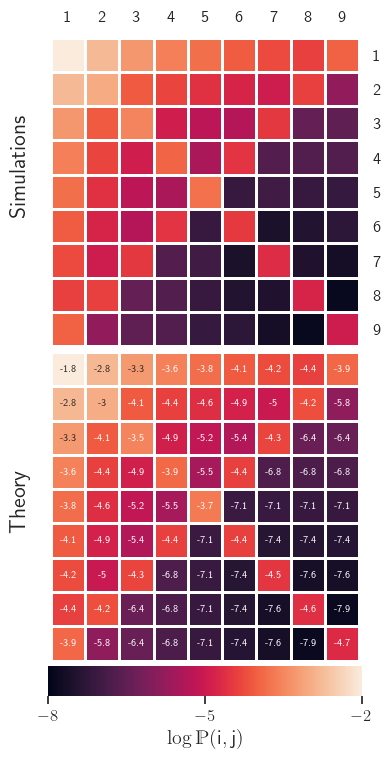

In [9]:
sbn.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'DejaVu Sans'})
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts, dsfont}')
# fig, (ax1, ax2, ax4) = plt.subplots(3,1, 
#                                    sharey=False, 
#                                    sharex=False, 
#                                    figsize=(4.5,9),
#                                    )

fig = plt.figure(figsize=(4.5,9))

num_columns = 20
num_rows = 20

ax1 = plt.subplot2grid((num_rows,num_columns), (0,0), colspan=20, rowspan=9)
ax2 = plt.subplot2grid((num_rows,num_columns), (9,0), colspan=20, rowspan=9)
ax4 = plt.subplot2grid((num_rows,num_columns), (18,1), colspan=18, rowspan=1)

# ax4 = fig.add_axes([36/37, 0.19, 1/37, 0.61])
frequencies = [i for i in range(1,10)]

sbn.heatmap(
    log_sim,
    ax=ax1,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws = {"label":r"\Large$\mathsf{\log \mathds{P}(i,j)}$", 
                "ticks":[-8,-5, -2], 
                "orientation":"horizontal",
                },
    cbar_ax=ax4,
    cmap='rocket')

sbn.heatmap(
    log_theory,
    ax=ax2,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":7})

ax1.tick_params(labelright=True, 
                labelleft=False, 
                labeltop=True,
                labelbottom=False,
                labelrotation=0,
                labelsize=12)
ax1.set_title("Simulations", rotation=90, x=-0.1, y=0.4, fontsize=16)

ax2.set_title("Theory", rotation=90, x=-0.1, y=0.4, fontsize=16)
ax4.tick_params(labelsize=12)
plt.show()

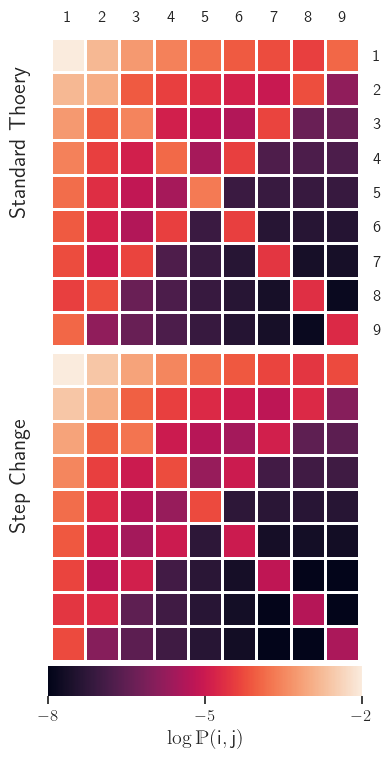

In [10]:
sbn.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'DejaVu Sans'})
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts, dsfont}')
# fig, (ax1, ax2, ax4) = plt.subplots(3,1, 
#                                    sharey=False, 
#                                    sharex=False, 
#                                    figsize=(4.5,9),
#                                    )

fig = plt.figure(figsize=(4.5,9))

num_columns = 20
num_rows = 20

ax1 = plt.subplot2grid((num_rows,num_columns), (0,0), colspan=20, rowspan=9)
ax2 = plt.subplot2grid((num_rows,num_columns), (9,0), colspan=20, rowspan=9)
ax4 = plt.subplot2grid((num_rows,num_columns), (18,1), colspan=18, rowspan=1)

# ax4 = fig.add_axes([36/37, 0.19, 1/37, 0.61])
frequencies = [i for i in range(1,10)]

sbn.heatmap(
    log_theory,
    ax=ax1,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws = {"label":r"\Large$\mathsf{\log \mathds{P}(i,j)}$", 
                "ticks":[-8,-5, -2], 
                "orientation":"horizontal",
                },
    cbar_ax=ax4,
    cmap='rocket')

sbn.heatmap(
    log_stepChange_25_2_theory,
    ax=ax2,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket')

ax1.tick_params(labelright=True, 
                labelleft=False, 
                labeltop=True,
                labelbottom=False,
                labelrotation=0,
                labelsize=12)
ax1.set_title("Standard Thoery", rotation=90, x=-0.1, y=0.4, fontsize=16)

ax2.set_title("Step Change", rotation=90, x=-0.1, y=0.4, fontsize=16)
ax4.tick_params(labelsize=12)
plt.show()

In [11]:
logSimsCsv = [np.array([i+1,j+1, log_sim[i,j]]) for i in range(9) for j in range(9)]
logTheoryCsv = [np.array([i+1,j+1, log_theory[i,j]]) for i in range(9) for j in range(9)]

In [12]:
logSimsCsv = np.asarray(logSimsCsv)
logTheoryCsv = np.asarray(logTheoryCsv)

In [13]:
np.savetxt('Logsims.csv', logSimsCsv, delimiter=',', header='', comments='')
np.savetxt('Logtheory.csv', logTheoryCsv, delimiter=',', header='', comments='')

In [14]:
relative_error = (jfs10-jfsDist_sim)/jfsDist_sim

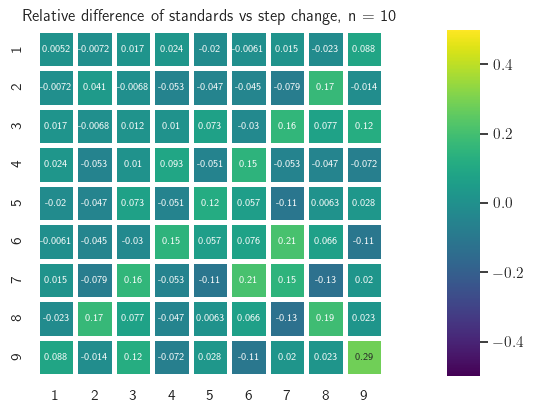

In [15]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 
sbn.heatmap(
    relative_error,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("Relative difference of standards vs step change, n = 10")
plt.show()

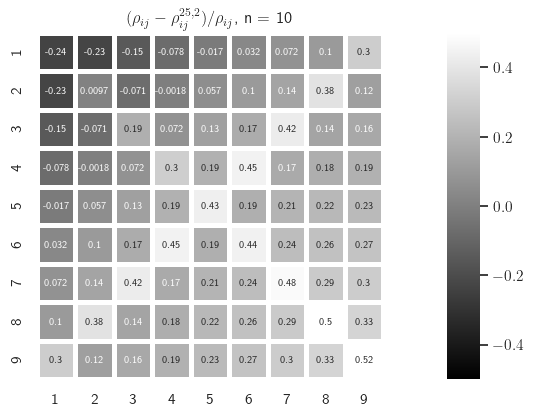

In [16]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 
sbn.heatmap(
    relative_diff,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$(\rho_{ij} - \rho_{ij}^{25,2})/\rho_{ij}$, n = 10")
plt.show()

In [17]:
from functools import reduce
with open(folder+'Mathematica/JointFreqSpectrum6'
          ,'rb') as f:
    depth=np.fromfile(f,dtype=np.dtype('int32'),count=1)
    dims =np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs6 =np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
         count=reduce(lambda x,y:x*y,dims)),dims)

In [18]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_100000_2", "rb") as file: 
    jfsDist6_sim = pickle.load(file)

jfsDist6_sim = 1/2 * (jfsDist6_sim + np.transpose(jfsDist6_sim))
jfsDist6_sim /= np.sum(jfsDist6_sim)

In [19]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_500000_2", "rb") as file: 
    jfsDist6_ = pickle.load(file)

jfsDist6_ = 1/2 * (jfsDist6_ + np.transpose(jfsDist6_))
jfsDist6_ /= np.sum(jfsDist6_)

In [20]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_1000000_2", "rb") as file: 
    jfsDist6_2 = pickle.load(file)

jfsDist6_2 = 1/2 * (jfsDist6_2 + np.transpose(jfsDist6_2))
jfsDist6_2 /= np.sum(jfsDist6_2)

In [21]:
relative_error_n6 = (jfs6-jfsDist6_sim)/jfsDist6_sim
relative_error_n6_ = (jfs6 - jfsDist6_)/jfsDist6_
relative_error_n6_2 = (jfs6 - jfsDist6_2)/jfsDist6_2

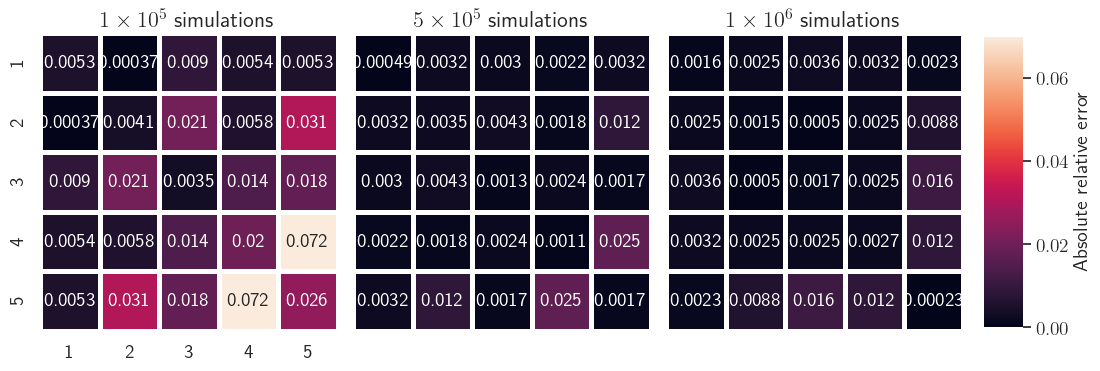

In [22]:
plt.rcParams.update({"text.usetex":True, 
                    "font.family": "sans-serif",
                    "font.sans-serif": "DejaVu Sans",})
# fig, (ax1,ax2, ax3,cbar_ax) = plt.subplots(1,4, 
#                              sharey = False,
#                              sharex = False,
#                              figsize = (13,4.5),
#                              gridspec_kw={}
#                             ) 

fig = plt.figure(figsize=(13,4.5))
# cbar_ax = fig.add_axes([0.915,0.17,0.03,0.65])

numrows = 100
numcolumns = 203

ax1 = plt.subplot2grid((numrows, numcolumns), (0,0), colspan=60, rowspan=100)
ax2 = plt.subplot2grid((numrows, numcolumns), (0,63), rowspan=100, colspan=60)
ax3 = plt.subplot2grid((numrows, numcolumns), (0,126), rowspan=100, colspan=60)
cbar_ax = plt.subplot2grid((numrows, numcolumns), (8,190), rowspan=84, colspan=8)

frequencies = [i for i in range(1,6)]
cbar_kws = dict(label= r"\Large Absolute relative error",
               ticks=[0,0.02,0.04,0.06],
               shrink=0.8)

sbn.heatmap(
    np.abs(relative_error_n6),
    ax=ax1,
    linewidths=2.5,
    vmin=0,
    vmax=0.07,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_ax=cbar_ax,
    cbar_kws=cbar_kws,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14})

sbn.heatmap(
    np.abs(relative_error_n6_),
    ax=ax2,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14})

sbn.heatmap(
    np.abs(relative_error_n6_2),
    ax=ax3,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14})

ax1.tick_params(labelsize=14)
cbar_ax.tick_params(labelsize=14)

ax1.set_title(r"$1 \times 10^5$ simulations", fontsize=16)
ax2.set_title(r" $5 \times 10^5$ simulations",fontsize=16)
ax3.set_title(r"$1 \times 10^6$ simulations",fontsize=16)


plt.show()

Now doing some analysis for $n=10$ to present in the poster

In [23]:
with open("/home/farid/Documents/NonGitCode/JFSDist1E5n10", "rb") as file: 
    jfsDist10_1 = pickle.load(file)

jfsDist10_1 = 1/2 * (jfsDist10_1 + np.transpose(jfsDist10_1))
jfsDist10_1 /= np.sum(jfsDist10_1)

In [24]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n10", "rb") as file: 
    jfsDist10_2 = pickle.load(file)

jfsDist10_2 = 1/2 * (jfsDist10_2 + np.transpose(jfsDist10_2))
jfsDist10_2 /= np.sum(jfsDist10_2)

In [25]:
with open("/home/farid/Documents/NonGitCode/JFSDist5E5n10", "rb") as file: 
    jfsDist10_5 = pickle.load(file)

jfsDist10_5 = 1/2 * (jfsDist10_5 + np.transpose(jfsDist10_5))
jfsDist10_5 /= np.sum(jfsDist10_5)

In [26]:
relative_error_n10_1 = (jfs10-jfsDist10_1)/jfsDist10_1
relative_error_n10_2 = (jfs10 - jfsDist10_2)/jfsDist10_2
relative_error_n10_5 = (jfs10 - jfsDist10_5)/jfsDist10_5

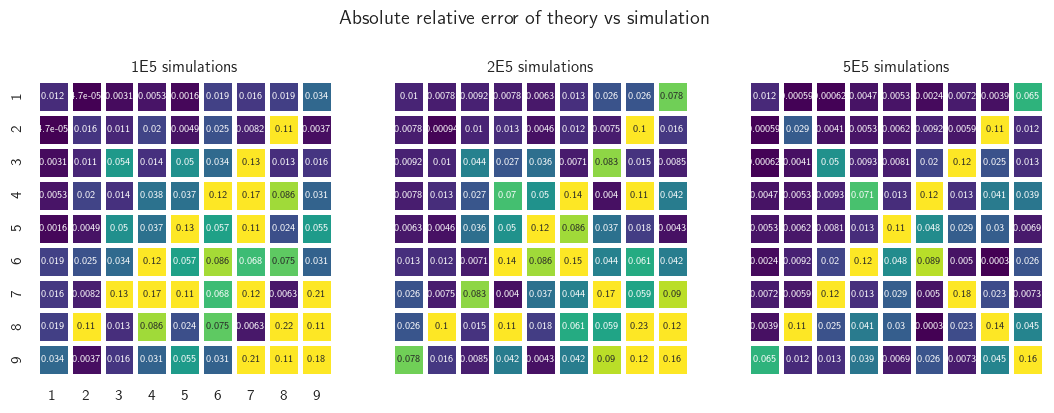

In [27]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,10)]

sbn.heatmap(
    np.abs(relative_error_n10_1),
    ax=ax1,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.abs(relative_error_n10_2),
    ax=ax2,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.abs(relative_error_n10_5),
    ax=ax3,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("1E5 simulations")
ax2.set_title("2E5 simulations")
ax3.set_title("5E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

In [28]:
print(np.sum(np.abs(relative_error_n10_1)),np.sum(np.abs(relative_error_n10_2)),np.sum(np.abs(relative_error_n10_5)))

4.333032040087605 3.800765219306317 2.6205263551048006


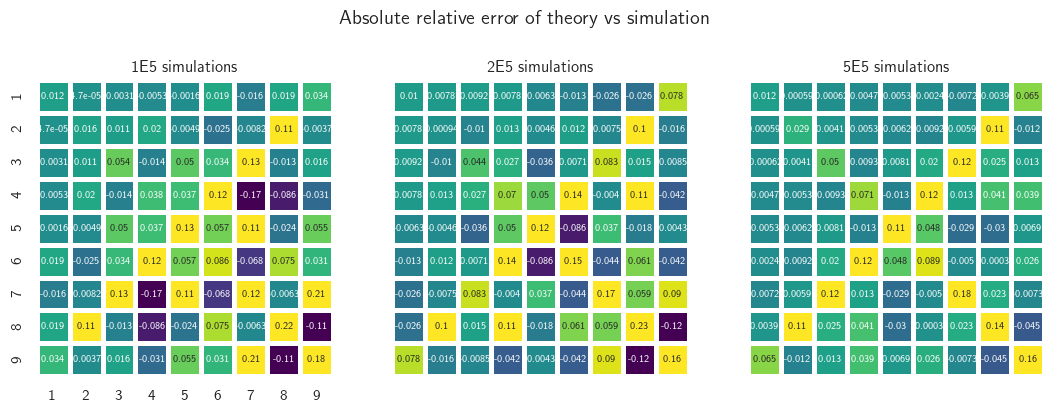

In [29]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,10)]

sbn.heatmap(
    relative_error_n10_1,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n10_2,
    ax=ax2,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n10_5,
    ax=ax3,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("1E5 simulations")
ax2.set_title("2E5 simulations")
ax3.set_title("5E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

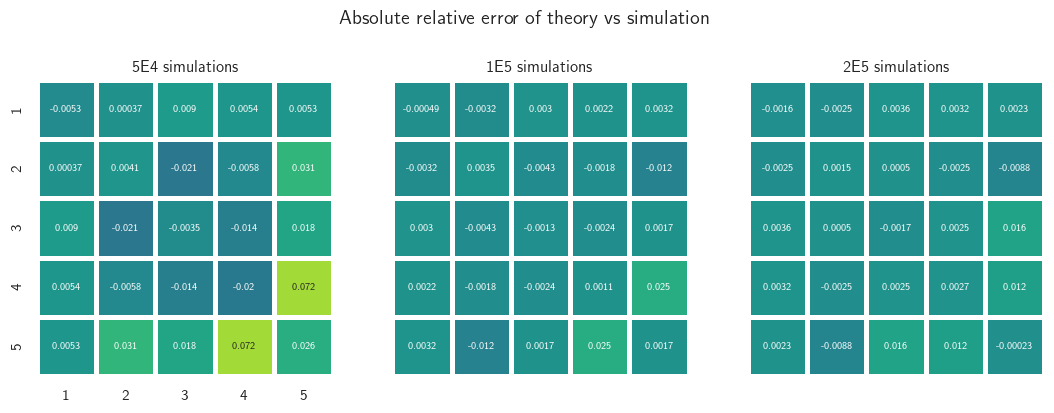

In [30]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,6)]

sbn.heatmap(
    relative_error_n6,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n6_,
    ax=ax2,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n6_2,
    ax=ax3,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("5E4 simulations")
ax2.set_title("1E5 simulations")
ax3.set_title("2E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

In [31]:
with open('/home/farid/Documents/git/jfsNumerics/Mathematica/JointFreqSpectrum20',
          'rb') as f: 
    depth=np.fromfile(f, dtype=np.dtype('int32'), count=1)
    dims = np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs20=np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
                                                count=reduce(lambda x,y:x*y,dims)), dims)

In [32]:
jfs20_log=np.log(jfs20)

In [33]:
print(np.max(jfs20_log), np.min(jfs20_log))

-2.2627994786732732 -9.848992432592128


<Axes: >

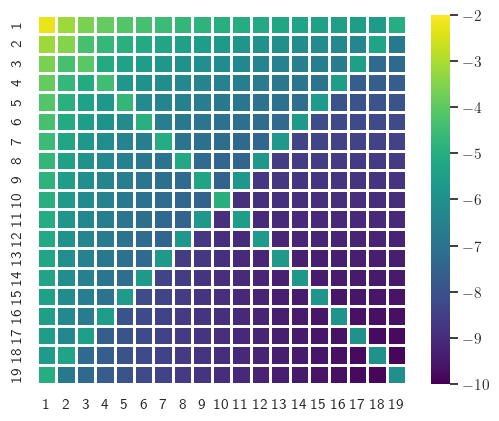

In [34]:
fig, ax = plt.subplots(1,1)
frequencies = [i for i in range(1,20)]

sbn.heatmap(
    jfs20_log,
    ax=ax,
    linewidths=1,
    vmin=-10,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cmap='viridis',
    )

In [76]:

# Replace 'your_file.csv' with the path to your CSV file
filename = 'JointFreqSpectrum30.csv'
filename2= 'JFS30_revised.csv'
filename3 = 'JFSn15.csv'
filename4 = 'JFS25_revised.csv'

# Load the CSV file into a NumPy array
# By default, np.loadtxt assumes the data is numerical and separated by commas
jfs30 = np.loadtxt(data_folder+filename, delimiter=',', skiprows=0)
normalisedjfs30=np.loadtxt(data_folder+filename2, delimiter=',', skiprows=0)
jfs15 = np.loadtxt(data_folder+filename3, delimiter=',', skiprows=0)
jfs25 = np.loadtxt(data_folder+filename4, delimiter=',', skiprows=0)

In [64]:
log_jfs30 = np.log(jfs30)
log_normalisedjfs30 = np.log(normalisedjfs30)

<Axes: >

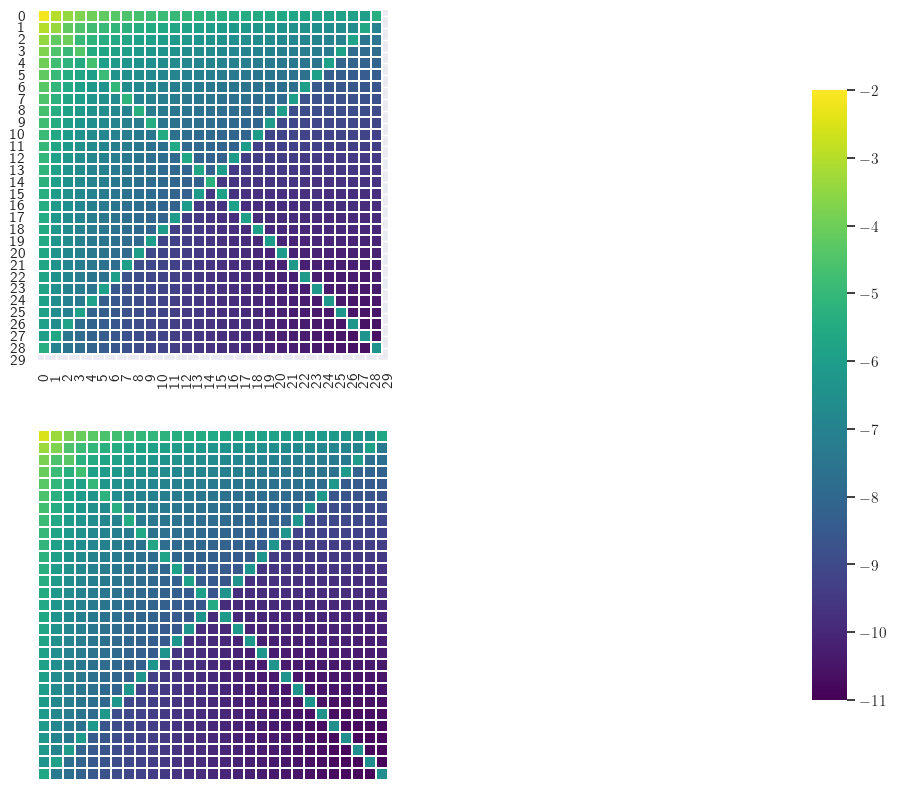

In [65]:
fig, (ax1, ax2) = plt.subplots(2,1,
                            sharey=False,
                            sharex=False,
                            figsize=(13,10))
frequencies = [i for i in range(30)]

ax3 = fig.add_axes((36/37, 0.19, 1/37, 0.61))
sbn.heatmap(
    log_jfs30,
    ax=ax1,
    linewidths=0.25,
    vmin=-11,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax3,
    cmap='viridis',
    annot=False,
    annot_kws={"fontsize":7})

sbn.heatmap(
    log_normalisedjfs30,
    ax=ax2,
    linewidths=0.25,
    vmin=-11,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=False,
    annot_kws={"fontsize":7})

In [66]:
normalised_jfs20 = jfs20/np.max(jfs20)
normalised_jfs10 = jfs10/np.max(jfs10)
normalised_normalised_jfs30 = normalisedjfs30/np.max(normalisedjfs30)

In [67]:
print([np.max(np.log(a)) for a in [normalised_jfs10, normalised_jfs20, normalised_normalised_jfs30]])
print([np.min(np.log(a)) for a in [normalised_jfs10, normalised_jfs20, normalised_normalised_jfs30]])

[0.0, 0.0, 0.0]
[-6.0711480258912065, -7.586192953918855, -8.400733265164563]


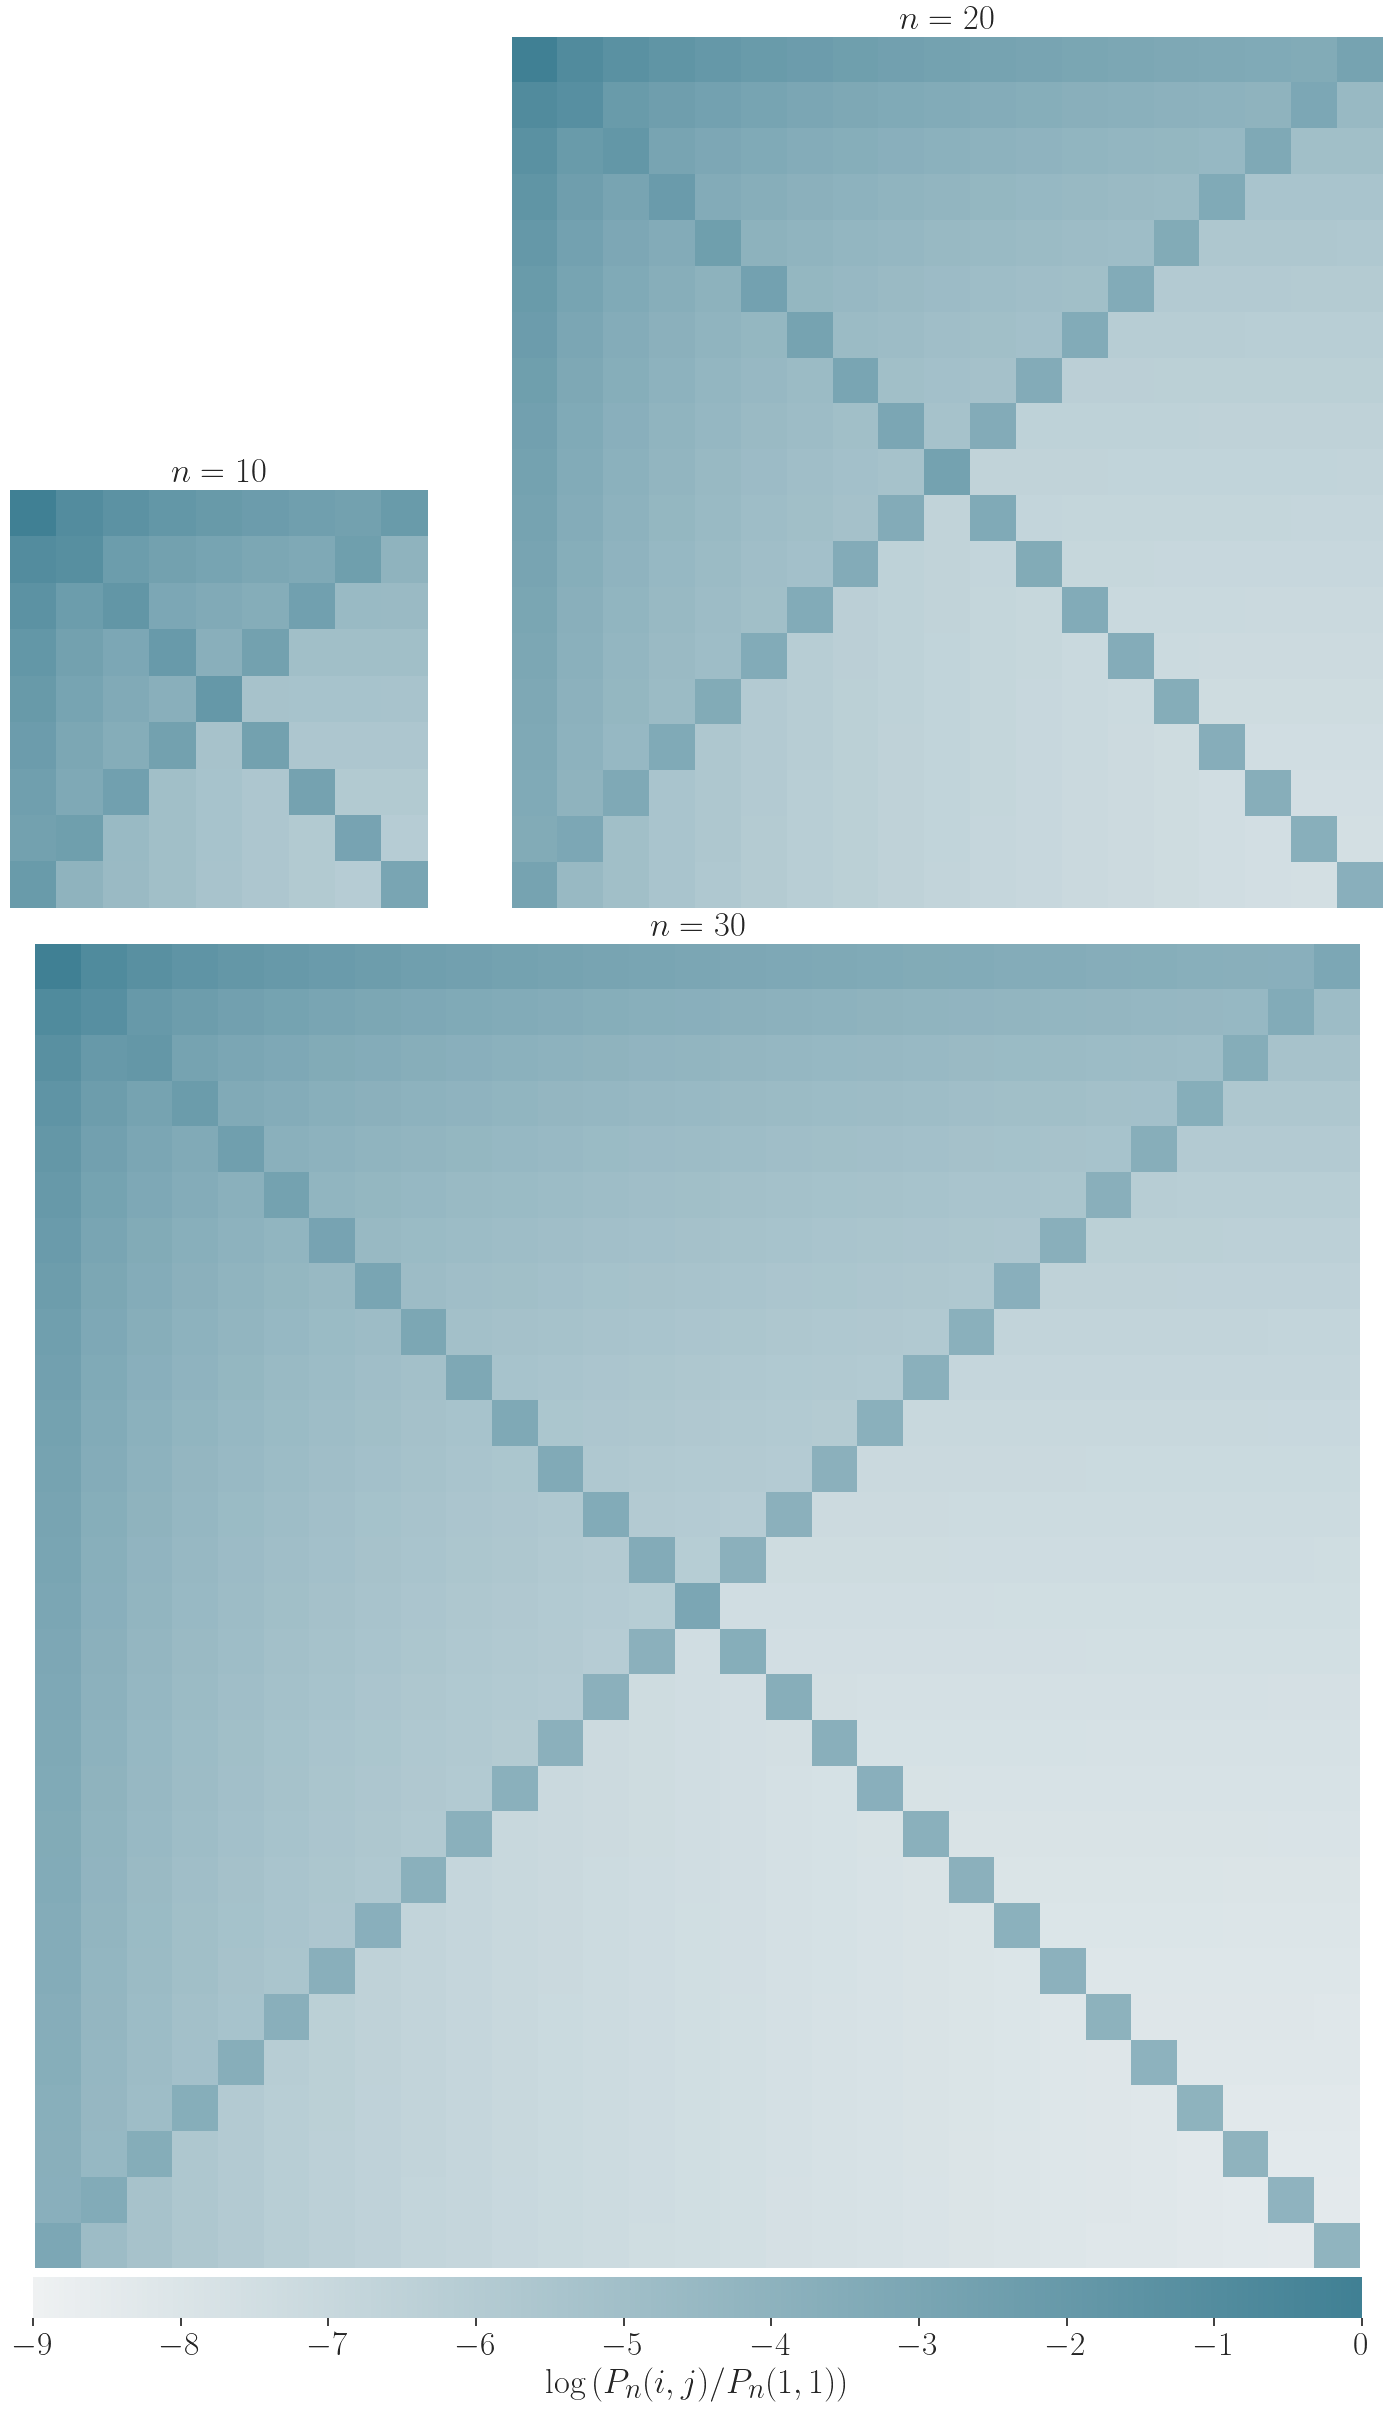

In [68]:
from matplotlib.gridspec import GridSpec


# plt.rcParams.update({"text.usetex":True, 
#                     "font.family": "sans-serif",
#                     "font.sans-serif": "DejaVu Sans",})

# data_10x10 = np.random.rand(10, 10)
# data_20x20 = np.random.rand(20, 20)
# data_30x30 = np.random.rand(30, 30)
# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(24*3/5, 24),layout='constrained')
gs = GridSpec(6, 4, figure=fig, width_ratios=[1,1,2,2], height_ratios=[1]*5+[0.1])

# Top-left heatmap (10x10)
ax0 = fig.add_subplot(gs[5,:])
ax1 = fig.add_subplot(gs[1, 0:2])
sbn.heatmap(np.log(normalised_jfs10), ax=ax1,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            vmax=0,
            vmin=-9,
            cbar=False,
            square=True,
            xticklabels=[],
            yticklabels=[])
ax1.tick_params(left=False, bottom=False)
ax1.set_title(r'\Huge $n=10$')

# Top-right larger heatmap (20x20)
ax2 = fig.add_subplot(gs[0:2, 2:])
sbn.heatmap(np.log(normalised_jfs20), ax=ax2, 
            cmap=sbn.color_palette("light:#408094", as_cmap=True), 
            cbar=False, 
            square=True, 
            vmin=-9, 
            vmax=0,
           xticklabels=[],
           yticklabels=[])
ax2.tick_params(left=False, bottom=False)
ax2.set_title(r'\Huge $n=20$')

# Bottom heatmap (30x30) spanning the width of the top two
ax3 = fig.add_subplot(gs[2:5, 0:])
sbn.heatmap(np.log(normalised_normalised_jfs30),
            ax=ax3,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            square=True,
            cbar=True, 
            cbar_ax=ax0,
            cbar_kws={'orientation':'horizontal',
                      "label":r"\Huge$\log \left(P_n(i,j)/P_n(1,1)\right)$"},
            vmax=0,
            vmin=-9,
           xticklabels=[],
           yticklabels=[])
ax3.set_title(r'\Huge $n=30$')
ax0.tick_params(labelsize=24)
ax0.set_aspect(0.283)
# ax3.tick_params(left=False, bottom=False)
# sbn.dark_palette("seagreen", as_cmap=True)
# sbn.set()
# Adjust layout and display the plot
plt.show()

In [69]:
filename3="CSFS_x2_BN.csv"
CSFS_x2_BN = np.loadtxt(data_folder+filename3, delimiter=',',skiprows=0)

In [70]:
print((CSFS_x2_BN - jfs10)/jfs10)

[[ 0.1645  0.1499  0.0851  0.0304 -0.0135 -0.0466 -0.0695 -0.0834 -0.1822]
 [ 0.1499 -0.0242  0.0174 -0.0361 -0.0784 -0.1098 -0.1314 -0.2364 -0.0758]
 [ 0.0851  0.0174 -0.1494 -0.0985 -0.1388 -0.1683 -0.2632 -0.1089 -0.1081]
 [ 0.0304 -0.0361 -0.0985 -0.2252 -0.1929 -0.2776 -0.1413 -0.1439 -0.1428]
 [-0.0135 -0.0784 -0.1388 -0.1929 -0.2802 -0.1706 -0.1770 -0.1792 -0.1780]
 [-0.0466 -0.1098 -0.1683 -0.2776 -0.1706 -0.2893 -0.2113 -0.2132 -0.2119]
 [-0.0695 -0.1314 -0.2632 -0.1413 -0.1770 -0.2113 -0.3011 -0.2450 -0.2435]
 [-0.0834 -0.2364 -0.1089 -0.1439 -0.1792 -0.2132 -0.2450 -0.3069 -0.2724]
 [-0.1822 -0.0758 -0.1081 -0.1428 -0.1780 -0.2119 -0.2435 -0.2724 -0.3082]]


In [71]:
CSFS_x2_BN.shape

(9, 9)

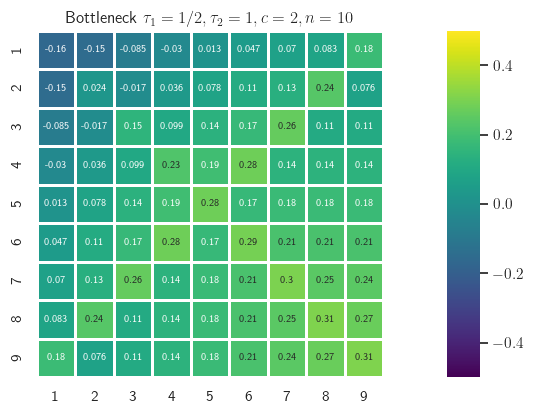

In [72]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    (jfs10-CSFS_x2_BN)/jfs10,
    ax=ax1,
    linewidths=1,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"Bottleneck $\tau_1 = 1/2, \tau_2 = 1, c=2, n = 10$")
plt.show()

### this is the CSFS when the population is is halved at t = 1/2, 
### then returns to its initial level when t = 1 (i.e. a bottleneck).

In [73]:
filenames = ["JFSBottleNeck" + str(x) + ".csv" for x in range(1,8)]

jfs_arrs = []
for file in filenames:
    jfs_arrs.append(np.loadtxt(data_folder+file, delimiter=',',skiprows=1))


firstset = [(1/2, 1, c, 1) for c in [2,5,10]]
secondset = [(1, 2, c, 1) for c in [2,5,10]]
keyset = firstset+secondset+[(0,0.02,10,1)]

jfsDict = {}
i=0
for params in keyset: 
    jfsDict[params] = jfs_arrs[i]
    i+=1


In [46]:
jfsDict[(0,0.02,10,1)].shape

(9, 9)

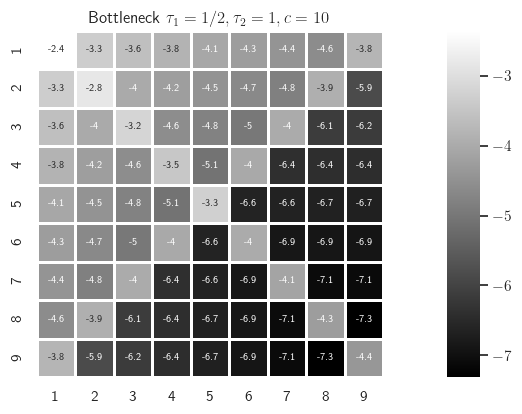

In [74]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    np.log(jfsDict[(0,0.02,10,1)]),
    ax=ax1,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"Bottleneck $\tau_1 = 1/2, \tau_2 = 1, c=10$")
plt.show()

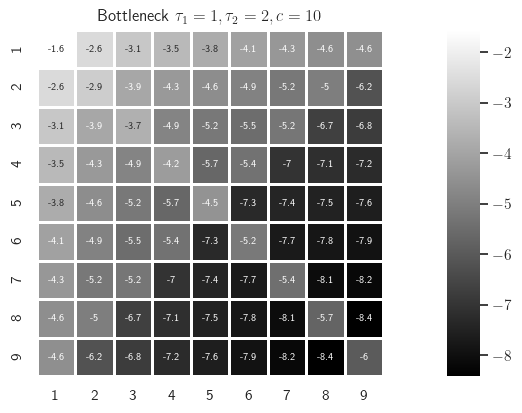

In [48]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    np.log(jfsDict[(1,2,10,1)]),
    ax=ax1,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"Bottleneck $\tau_1 = 1, \tau_2 = 2, c=10$")
plt.show()

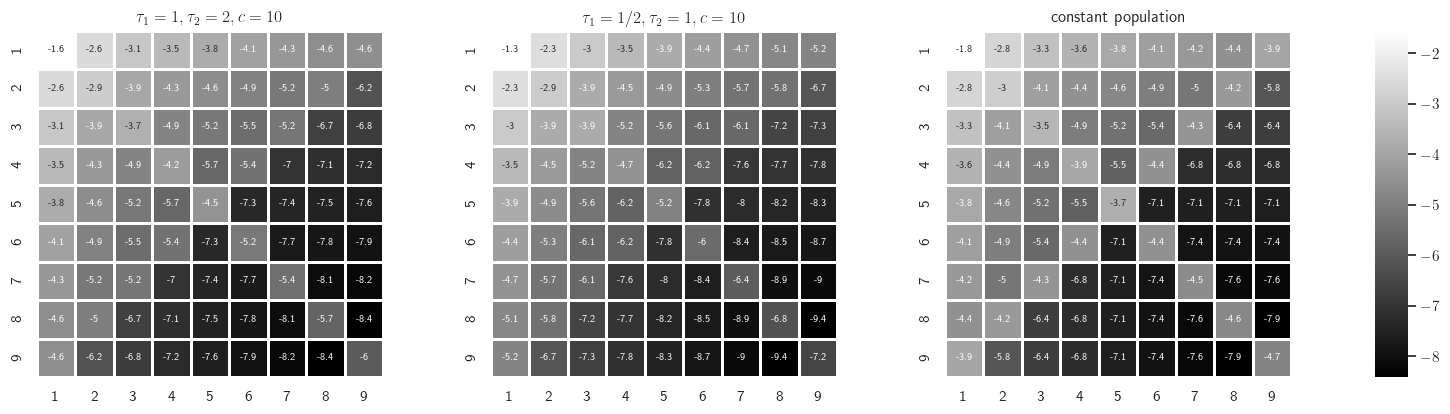

In [49]:
fix, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]}) 

frequencies = [i for i in range(1,10)]
sbn.heatmap(
    np.log(jfsDict[(1,2,10,1)]),
    ax=ax1,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax4,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.log(jfsDict[(0.5,1,10,1)]),
    ax=ax2,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.log(jfs10),
    ax=ax3,
    linewidths=1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    cmap='gray',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$\tau_1 = 1, \tau_2 = 2, c=10$")
ax2.set_title(r"$\tau_1 = 1/2, \tau_2 = 1, c=10$")
ax3.set_title(r"constant population")
plt.show()

In [77]:
#I want to calculate the mutual information between the frequencies b1 and b2
jfs10_marginal = np.sum(jfs10, axis=0)
jfs10_indep = np.outer(jfs10_marginal, jfs10_marginal)

jfs15_marginal = np.sum(jfs15, axis=0)
jfs15_indep = np.outer(jfs15_marginal, jfs15_marginal)

jfs20_marginal = np.sum(jfs20, axis=0)
jfs20_indep = np.outer(jfs20_marginal, jfs20_marginal)

jfs25_marginal = np.sum(jfs25, axis=0)
jfs25_indep = np.outer(jfs25_marginal, jfs25_marginal)

jfs30_marginal = np.sum(normalisedjfs30, axis=0)
jfs30_indep = np.outer(jfs30_marginal, jfs30_marginal)


marginal_entropy_n10 = -np.sum(jfs10_marginal*np.log(jfs10_marginal))
marginal_entropy_n20 = -np.sum(jfs20_marginal*np.log(jfs20_marginal))
marginal_entropy_n30 = -np.sum(jfs30_marginal*np.log(jfs30_marginal))
marginal_entropy_n15 = -np.sum(jfs15_marginal*np.log(jfs15_marginal))
marginal_entropy_n25 = -np.sum(jfs25_marginal*np.log(jfs25_marginal))



mutual_information_n10 = -np.sum(jfs10* np.log(jfs10_indep/jfs10))
mutual_information_n20 = -np.sum(jfs20* np.log(jfs20_indep/jfs20))
mutual_information_n30 = -np.sum(normalisedjfs30* np.log(jfs30_indep/normalisedjfs30))
mutual_information_n15 = -np.sum(jfs15* np.log(jfs15_indep/jfs15))
mutual_information_n25 = -np.sum(jfs25* np.log(jfs25_indep/jfs25))


print(f"H_10 ={marginal_entropy_n10}, I_10 = {mutual_information_n10}, \
I/H = {mutual_information_n10/marginal_entropy_n10}")
print(f"H_15 ={marginal_entropy_n15}, I_15 = {mutual_information_n15},\
I/H = {mutual_information_n15/marginal_entropy_n15}")
print(f"H_20 ={marginal_entropy_n20}, I_20 = {mutual_information_n20}, \
I/H = {mutual_information_n20/marginal_entropy_n20}")
print(f"H_25 ={marginal_entropy_n25}, I_25 = {mutual_information_n25},\
I/H = {mutual_information_n25/marginal_entropy_n25}")
print(f"H_30 ={marginal_entropy_n30}, I_30 = {mutual_information_n30},\
I/H = {mutual_information_n30/marginal_entropy_n30}")


H_10 =1.8950086716838257, I_10 = 0.12189059694093185, I/H = 0.06432192040188657
H_15 =2.2004816174421116, I_15 = 0.1276691305295534,I/H = 0.0580187216823737
H_20 =2.43077440119297, I_20 = 0.13960806452244198, I/H = 0.05743357526470801
H_25 =2.6071752252767824, I_25 = 0.14268584779981391,I/H = 0.05472813887477246
H_30 =2.7462363713793314, I_30 = 0.14875657033014475,I/H = 0.05416743142740838


In [51]:
np.sum(jfs30)

1.396500590110019

In [52]:
(jfs10-jfs10_indep)/jfs10

array([[ 0.1402, -0.1476, -0.1774, -0.2057, -0.2329, -0.2593, -0.2852,
        -0.3106,  0.2993],
       [-0.1476,  0.3484, -0.2828, -0.3020, -0.3222, -0.3430, -0.3641,
         0.4804, -1.3213],
       [-0.1774, -0.2828,  0.5146, -0.4088, -0.4207, -0.4348,  0.5583,
        -1.9201, -1.6289],
       [-0.2057, -0.3020, -0.4088,  0.6282, -0.5307,  0.5913, -2.6667,
        -2.2449, -1.9182],
       [-0.2329, -0.3222, -0.4207, -0.5307,  0.8101, -3.6490, -3.0240,
        -2.5576, -2.1967],
       [-0.2593, -0.3430, -0.4348,  0.5913, -3.6490,  0.7369, -3.3732,
        -2.8633, -2.4688],
       [-0.2852, -0.3641,  0.5583, -2.6667, -3.0240, -3.3732,  0.7859,
        -3.1647, -2.7371],
       [-0.3106,  0.4804, -1.9201, -2.2449, -2.5576, -2.8633, -3.1647,
         0.8206, -3.0033],
       [ 0.2993, -1.3213, -1.6289, -1.9182, -2.1967, -2.4688, -2.7371,
        -3.0033,  0.8463]])

In [53]:
jfs10

array([[ 0.1684,  0.0608,  0.0385,  0.0277,  0.0213,  0.0172,  0.0143,
         0.0122,  0.0201],
       [ 0.0608,  0.0516,  0.0170,  0.0123,  0.0096,  0.0078,  0.0065,
         0.0148,  0.0029],
       [ 0.0385,  0.0170,  0.0292,  0.0074,  0.0058,  0.0047,  0.0130,
         0.0017,  0.0017],
       [ 0.0277,  0.0123,  0.0074,  0.0207,  0.0040,  0.0122,  0.0012,
         0.0011,  0.0011],
       [ 0.0213,  0.0096,  0.0058,  0.0040,  0.0251,  0.0008,  0.0008,
         0.0008,  0.0008],
       [ 0.0172,  0.0078,  0.0047,  0.0122,  0.0008,  0.0123,  0.0006,
         0.0006,  0.0006],
       [ 0.0143,  0.0065,  0.0130,  0.0012,  0.0008,  0.0006,  0.0109,
         0.0005,  0.0005],
       [ 0.0122,  0.0148,  0.0017,  0.0011,  0.0008,  0.0006,  0.0005,
         0.0098,  0.0004],
       [ 0.0201,  0.0029,  0.0017,  0.0011,  0.0008,  0.0006,  0.0005,
         0.0004,  0.0089]])

In [54]:
jfsDict.keys()

dict_keys([(0.5, 1, 2, 1), (0.5, 1, 5, 1), (0.5, 1, 10, 1), (1, 2, 2, 1), (1, 2, 5, 1), (1, 2, 10, 1), (0, 0.02, 10, 1)])

In [55]:
print(np.min(jfsDict[(1,2,10,1)]/jfs10),
          np.min(jfsDict[(0.5,1,10,1)]/jfs10), np.min(jfsDict[(0,0.02,10,1)]/jfs10))
print(np.max(jfsDict[(1,2,10,1)]/jfs10),
          np.max(jfsDict[(0.5,1,10,1)]/jfs10), np.max(jfsDict[(0,0.02,10,1)]/jfs10))


0.2838863770570951 0.0871147539866258 0.5631802045175978
1.2749165190627805 1.6816910210914378 1.7137820502452203


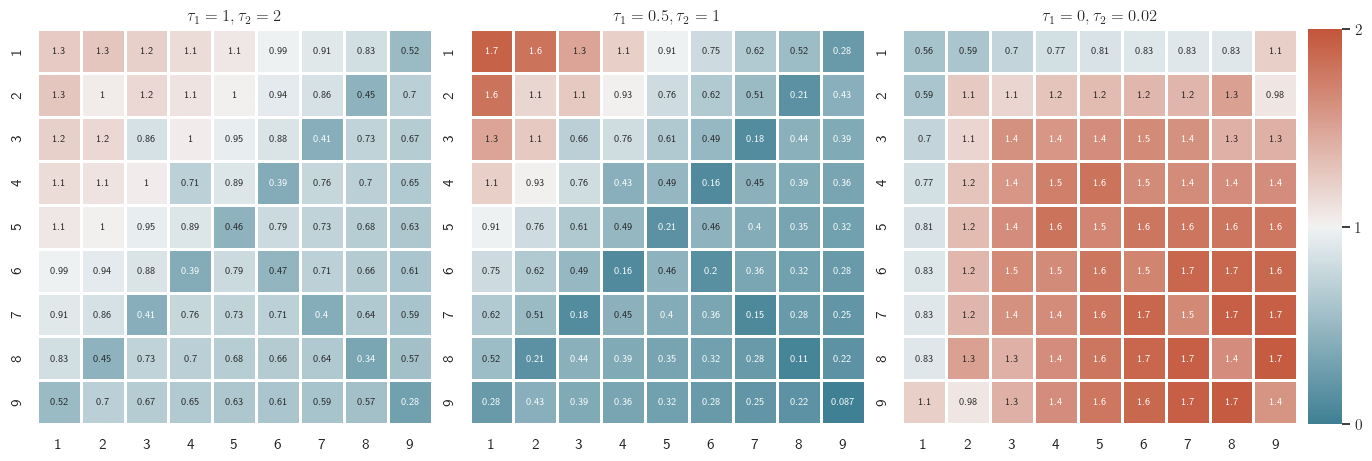

In [56]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]},
                                layout='compressed') 

frequencies = [i for i in range(1,10)]
sbn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sbn.heatmap(
    jfsDict[(1,2,10,1)]/jfs10,
    ax=ax1,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=2,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4, 'orientation':'vertical',
             'ticks':[0,1,2]},
    cbar_ax=ax4,
    annot=True,
    annot_kws={"fontsize":7},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    jfsDict[(0.5,1,10,1)]/jfs10,
    ax=ax2,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    annot=True,
    annot_kws={"fontsize":7},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    jfsDict[(0,0.02,10,1)]/jfs10,
    ax=ax3,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    cmap=sbn.diverging_palette(220, 20, as_cmap=True),
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$\tau_1 = 1, \tau_2 = 2$")
ax2.set_title(r"$\tau_1 = 0.5, \tau_2 = 1$")
ax3.set_title(r"$\tau_1 = 0, \tau_2 = 0.02$")
plt.show()

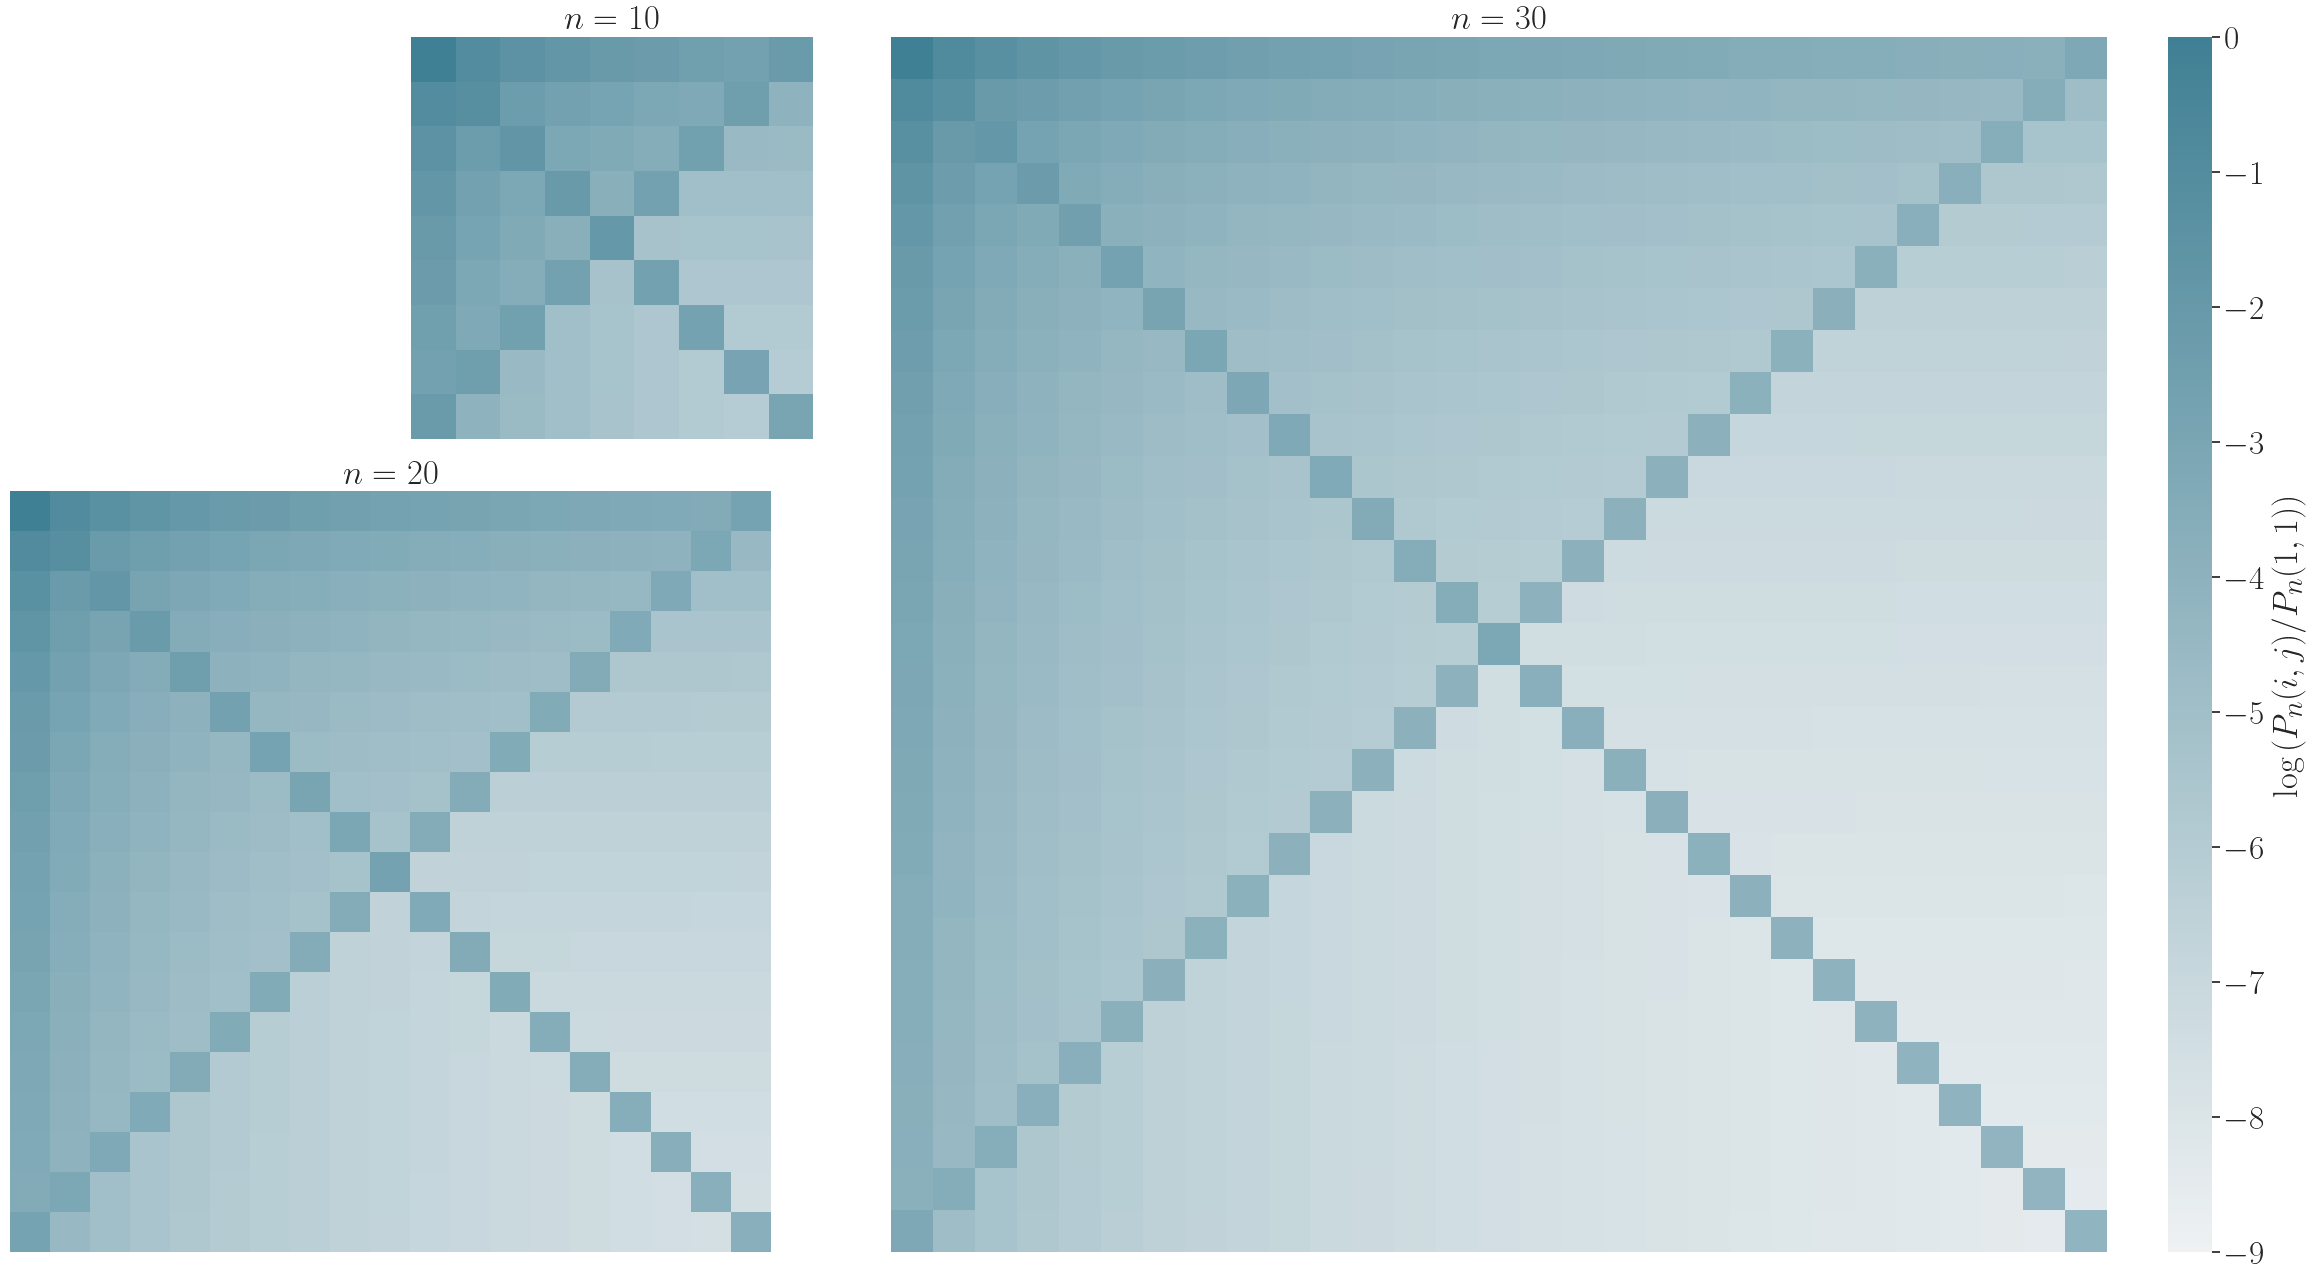

In [57]:
from matplotlib.gridspec import GridSpec


# plt.rcParams.update({"text.usetex":True, 
#                     "font.family": "sans-serif",
#                     "font.sans-serif": "DejaVu Sans",})

# data_10x10 = np.random.rand(10, 10)
# data_20x20 = np.random.rand(20, 20)
# data_30x30 = np.random.rand(30, 30)
# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(24, 24*3/5),layout='compressed')
gs = GridSpec(4, 6, figure=fig, height_ratios=[1,1,2,2], width_ratios=[1]*5+[0.1])

# Top-left heatmap (10x10)
ax0 = fig.add_subplot(gs[:,5])
ax1 = fig.add_subplot(gs[0:2, 1])
sbn.heatmap(np.log(normalised_jfs10), ax=ax1,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            vmax=0,
            vmin=-9,
            cbar=False,
            square=True,
            xticklabels=[],
            yticklabels=[])
ax1.tick_params(left=False, bottom=False)
ax1.set_title(r'\Huge $n=10$')

# Top-right larger heatmap (20x20)
ax2 = fig.add_subplot(gs[2:, 0:2])
sbn.heatmap(np.log(normalised_jfs20), ax=ax2, 
            cmap=sbn.color_palette("light:#408094", as_cmap=True), 
            cbar=False, 
            square=True, 
            vmin=-9, 
            vmax=0,
           xticklabels=[],
           yticklabels=[])
ax2.tick_params(left=False, bottom=False)
ax2.set_title(r'\Huge $n=20$')

# Bottom heatmap (30x30) spanning the width of the top two
ax3 = fig.add_subplot(gs[0:, 2:5])
sbn.heatmap(np.log(normalised_normalised_jfs30),
            ax=ax3,
            cmap=sbn.color_palette("light:#408094", as_cmap=True),
            square=True,
            cbar=True, 
            cbar_ax=ax0,
            cbar_kws={'orientation':'vertical',
                      "label":r"\Huge$\log \left(P_n(i,j)/P_n(1,1)\right)$"},
            vmax=0,
            vmin=-9,
           xticklabels=[],
           yticklabels=[])
ax3.set_title(r'\Huge $n=30$')
ax0.tick_params(labelsize=24)
# ax0.set_aspect(0.283)

plt.show()

In [58]:
marginal_dict = {} 
for key in jfsDict.keys():
    dist = jfsDict[key]
    marginal_dist = np.array([sum(dist[i, :]) for i in range(dist.shape[0])])
    marginal_dict[key] = marginal_dist


In [59]:
jfsDict.keys()


dict_keys([(0.5, 1, 2, 1), (0.5, 1, 5, 1), (0.5, 1, 10, 1), (1, 2, 2, 1), (1, 2, 5, 1), (1, 2, 10, 1), (0, 0.02, 10, 1)])

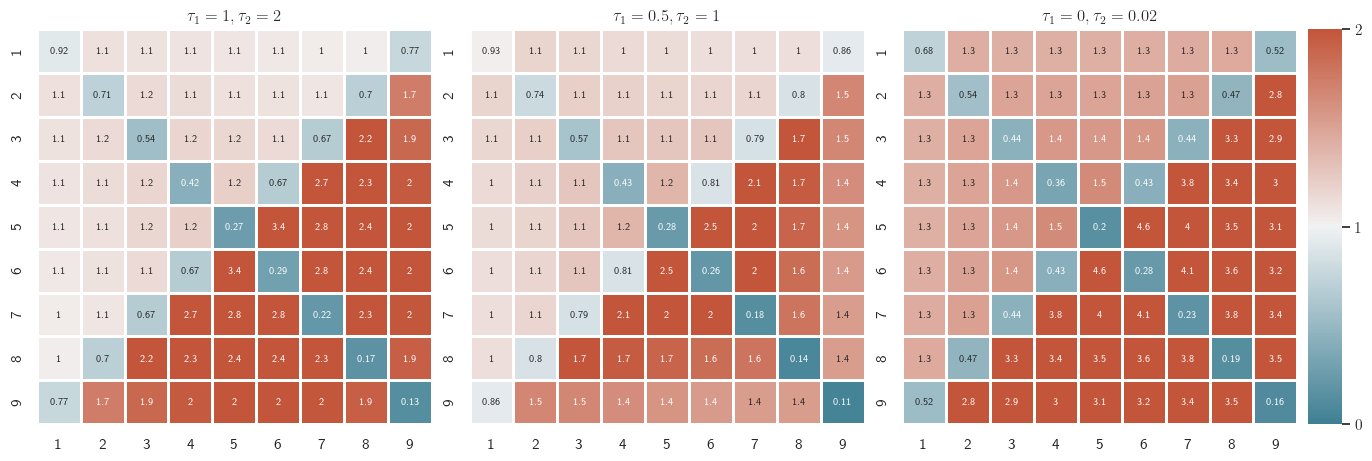

In [60]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, 
                             sharey = False,
                             sharex = False,
                             figsize = (18,4.5),
                             gridspec_kw={'width_ratios':[12,12,12,1]},
                                layout='compressed') 

frequencies = [i for i in range(1,10)]
sbn.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sbn.heatmap(
    np.outer(marginal_dict[(1,2,10,1)], marginal_dict[(1,2,10,1)])/jfsDict[(1,2,10,1)],
    ax=ax1,
    linewidths=1,
    square=True,
    vmin=0,
    vmax=2,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4, 'orientation':'vertical',
             'ticks':[0,1,2]},
    cbar_ax=ax4,
    annot=True,
    annot_kws={"fontsize":7},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    np.outer(marginal_dict[(0.5,1,10,1)], marginal_dict[(0.5,1,10,1)])/jfsDict[(0.5,1,10,1)],
    ax=ax2,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    annot=True,
    annot_kws={"fontsize":7},
    cmap=sbn.diverging_palette(220, 20, as_cmap=True))

sbn.heatmap(
    np.outer(marginal_dict[(0,0.02,10,1)], marginal_dict[(0,0.02,10,1)])/jfsDict[(0,0.02,10,1)],
    ax=ax3,
    linewidths=1,
    square=True,
    vmin=0.08,
    vmax=1.75,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=False,
    cmap=sbn.diverging_palette(220, 20, as_cmap=True),
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$\tau_1 = 1, \tau_2 = 2$")
ax2.set_title(r"$\tau_1 = 0.5, \tau_2 = 1$")
ax3.set_title(r"$\tau_1 = 0, \tau_2 = 0.02$")
plt.show()

In [61]:
sum(marginal_dict[(0,0.02,10,1)])
np.sum(jfsDict[(1,2,10,1)])

0.9990994008957037

In [62]:
# jfs10_marginal = np.sum(jfs10, axis=0)
# jfs10_indep = np.outer(jfs10_marginal, jfs10_marginal)

# jfs20_marginal = np.sum(jfs20, axis=0)
# jfs20_indep = np.outer(jfs20_marginal, jfs20_marginal)

# jfs30_marginal = np.sum(normalisedjfs30, axis=0)
# jfs30_indep = np.outer(jfs30_marginal, jfs30_marginal)


marginal_entropy_1 = -np.sum(
    marginal_dict[(0,0.02,10,1)]*np.log(marginal_dict[(0,0.02,10,1)]))
marginal_entropy_2 = -np.sum(
     marginal_dict[(0.5,1,10,1)]*np.log(marginal_dict[(0.5,1,10,1)]))
marginal_entropy_3 = -np.sum(
     marginal_dict[(1,2,10,1)]*np.log(marginal_dict[(1,2,10,1)]))

indep_dist1 = np.outer(marginal_dict[(0,0.02,10,1)], marginal_dict[(0,0.02,10,1)])
indep_dist2 = np.outer(marginal_dict[(0.5,1,10,1)], marginal_dict[(0.5,1,10,1)])
indep_dist3 = np.outer(marginal_dict[(1,2,10,1)], marginal_dict[(1,2,10,1)])

mutual_information1 = -np.sum(
    jfsDict[(0,0.02, 10, 1)]* np.log(indep_dist1/jfsDict[(0,0.02, 10, 1)]))
mutual_information2 = -np.sum(
    jfsDict[(0.5,1, 10, 1)]* np.log(indep_dist2/jfsDict[(0.5,1, 10, 1)]))
mutual_information3 = -np.sum(
    jfsDict[(1,2, 10, 1)]* np.log(indep_dist1/jfsDict[(1,2, 10, 1)]))


print(f"H_10 ={marginal_entropy_1}, I_10 = {mutual_information1}, \
I/H = {mutual_information1/marginal_entropy_1}")
print(f"H_10 ={marginal_entropy_2}, I_10 = {mutual_information2}, \
I/H = {mutual_information2/marginal_entropy_2}")
print(f"H_10 ={marginal_entropy_3}, I_10 = {mutual_information3}, \
I/H = {mutual_information3/marginal_entropy_3}")

H_10 =2.0273373123031315, I_10 = 0.23413931010399652, I/H = 0.11549104763331439
H_10 =1.4614156769621194, I_10 = 0.03368788101041852, I/H = 0.023051539367941055
H_10 =1.6887850578310752, I_10 = 0.276215902787867, I/H = 0.16355894523522968
